<a href="https://colab.research.google.com/github/chuchun2/ATMS597-Project6-GroupB/blob/master/ATMS597_Project6_GroupB_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline
import xarray as xr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from google.colab import drive
drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
# Set your directory path
YOUR_DIRECTORY = '/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/'  # Chu-Chun
# YOUR_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/Project_6/' # Jeff

In [0]:
# Load saved combined data
AR_MJOIndices_df = pd.read_csv(YOUR_DIRECTORY + 'AR_MJOIndices_v1.csv', index_col = 'Unnamed: 0')
UR_MJOIndices_df = pd.read_csv(YOUR_DIRECTORY + 'UR_MJOIndices_v1.csv', index_col = 'Unnamed: 0')
AR_MJOIndices_df.columns.name = 'Date'
UR_MJOIndices_df.columns.name = 'Date'
AR_MJOIndices_df.index = pd.to_datetime(AR_MJOIndices_df.index)
UR_MJOIndices_df.index = pd.to_datetime(UR_MJOIndices_df.index)

In [0]:
# Add year, month, day as features
AR_MJOIndices_df['Year'] = AR_MJOIndices_df.index.year
AR_MJOIndices_df['Month'] = AR_MJOIndices_df.index.month
AR_MJOIndices_df['Day'] = AR_MJOIndices_df.index.day

UR_MJOIndices_df['Year'] = UR_MJOIndices_df.index.year
UR_MJOIndices_df['Month'] = UR_MJOIndices_df.index.month
UR_MJOIndices_df['Day'] = UR_MJOIndices_df.index.day

# Select only Oct-Mar
AR_MJOIndices_df = AR_MJOIndices_df[~AR_MJOIndices_df.index.month.isin([4, 5, 6, 7, 8, 9])]
UR_MJOIndices_df = UR_MJOIndices_df[~UR_MJOIndices_df.index.month.isin([4, 5, 6, 7, 8, 9])]

In [0]:
AR_MJOIndices_df

Date,AR_PRCP,AR_TMAX,AR_TMIN,MJOPhase_OLR,MJOAmplitude_OLR,AR_ERA5_Soil_Moisture_Lev1,AR_ERA5_Soil_Moisture_Lev2,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,AR_ERA5_Soil_Moisture_Lev1_lag5,AR_ERA5_Soil_Moisture_Lev1_lag10,AR_ERA5_Soil_Moisture_Lev1_lag15,AR_ERA5_Soil_Moisture_Lev1_lag20,AR_ERA5_Soil_Moisture_Lev1_lag25,AR_ERA5_Soil_Moisture_Lev1_lag30,AR_ERA5_Soil_Moisture_Lev2_lag5,AR_ERA5_Soil_Moisture_Lev2_lag10,AR_ERA5_Soil_Moisture_Lev2_lag15,AR_ERA5_Soil_Moisture_Lev2_lag20,AR_ERA5_Soil_Moisture_Lev2_lag25,AR_ERA5_Soil_Moisture_Lev2_lag30,Year,Month,Day
1980-01-01,0.0,30.8,11.2,5,0.6049,0.209384,0.205773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,1
1980-01-02,0.0,28.4,19.9,5,0.6069,0.181627,0.198426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,2
1980-01-03,0.0,27.4,10.8,5,0.5613,0.175117,0.192707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,3
1980-01-04,0.0,32.8,17.3,6,0.6842,0.150012,0.179462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,4
1980-01-05,18.0,28.2,17.3,6,0.8435,0.191845,0.175685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,21.0,6,1.1587,0.128531,0.143121,5.0,3.0,2.0,2.0,2.0,1.0,0.7047,0.9707,1.2778,1.0271,0.5132,0.6084,0.174359,0.121929,0.128356,0.130884,0.133617,0.220583,0.146542,0.140451,0.143045,0.144076,0.153391,0.172145,2019,12,27
2019-12-28,0.0,36.0,NaN,7,0.8633,0.127302,0.142428,5.0,4.0,3.0,2.0,2.0,1.0,0.9082,0.8321,1.4159,0.9916,0.5849,0.7808,0.145862,0.121794,0.129112,0.134989,0.149021,0.190800,0.140540,0.141074,0.143887,0.143760,0.151128,0.169635,2019,12,28
2019-12-29,NaN,NaN,13.0,7,0.8687,0.124223,0.140815,5.0,4.0,2.0,2.0,2.0,1.0,1.0406,0.6850,1.4550,1.0979,0.5831,0.9184,0.131774,0.128414,0.126334,0.126544,0.149358,0.171604,0.139379,0.143530,0.144358,0.140817,0.151408,0.164705,2019,12,29
2019-12-30,5.1,35.2,NaN,8,0.6520,0.162332,0.140790,6.0,4.0,3.0,2.0,2.0,2.0,1.3163,0.5752,1.2130,1.0314,0.8372,0.7178,0.137483,0.235895,0.131006,0.126849,0.152296,0.153076,0.144089,0.146751,0.145781,0.139144,0.150338,0.161003,2019,12,30


In [0]:
UR_MJOIndices_df

Date,UR_PRCP,UR_TMAX,UR_TMIN,MJOPhase_OLR,MJOAmplitude_OLR,UR_ERA5_Soil_Moisture_Lev1,UR_ERA5_Soil_Moisture_Lev2,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,UR_ERA5_Soil_Moisture_Lev1_lag5,UR_ERA5_Soil_Moisture_Lev1_lag10,UR_ERA5_Soil_Moisture_Lev1_lag15,UR_ERA5_Soil_Moisture_Lev1_lag20,UR_ERA5_Soil_Moisture_Lev1_lag25,UR_ERA5_Soil_Moisture_Lev1_lag30,UR_ERA5_Soil_Moisture_Lev2_lag5,UR_ERA5_Soil_Moisture_Lev2_lag10,UR_ERA5_Soil_Moisture_Lev2_lag15,UR_ERA5_Soil_Moisture_Lev2_lag20,UR_ERA5_Soil_Moisture_Lev2_lag25,UR_ERA5_Soil_Moisture_Lev2_lag30,Year,Month,Day
1980-01-01,NaN,NaN,NaN,5,0.6049,0.288419,0.282159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,1
1980-01-02,NaN,NaN,NaN,5,0.6069,0.266946,0.273913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,2
1980-01-03,NaN,NaN,NaN,5,0.5613,0.249743,0.265073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,3
1980-01-04,NaN,NaN,NaN,6,0.6842,0.236287,0.256058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,4
1980-01-05,NaN,NaN,NaN,6,0.8435,0.229866,0.251918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.0,NaN,20.6,6,1.1587,0.252046,0.296892,5.0,3.0,2.0,2.0,2.0,1.0,0.7047,0.9707,1.2778,1.0271,0.5132,0.6084,0.289805,0.368977,0.245598,0.264591,0.323730,0.457367,0.307601,0.330680,0.293596,0.316519,0.374957,0.445605,2019,12,27
2019-12-28,0.0,38.8,NaN,7,0.8633,0.248207,0.294636,5.0,4.0,3.0,2.0,2.0,1.0,0.9082,0.8321,1.4159,0.9916,0.5849,0.7808,0.274193,0.333628,0.255413,0.256981,0.304944,0.418799,0.301299,0.323458,0.296997,0.309881,0.359997,0.429099,2019,12,28
2019-12-29,32.5,38.5,20.2,7,0.8687,0.302355,0.290420,5.0,4.0,2.0,2.0,2.0,1.0,1.0406,0.6850,1.4550,1.0979,0.5831,0.9184,0.259452,0.303396,0.263900,0.246490,0.294355,0.383785,0.293953,0.315749,0.307738,0.298280,0.350091,0.410580,2019,12,29
2019-12-30,0.0,36.4,23.4,8,0.6520,0.286266,0.287868,6.0,4.0,3.0,2.0,2.0,2.0,1.3163,0.5752,1.2130,1.0314,0.8372,0.7178,0.249531,0.282066,0.283434,0.239859,0.290329,0.361359,0.288972,0.307361,0.306723,0.290174,0.341213,0.399591,2019,12,30


# (1) AR_PRCP linear regression

In [0]:
# clean the data
data = AR_MJOIndices_df.drop(columns = ['AR_TMAX', 'AR_TMIN'])
data = data.dropna()
data

Date,AR_PRCP,MJOPhase_OLR,MJOAmplitude_OLR,AR_ERA5_Soil_Moisture_Lev1,AR_ERA5_Soil_Moisture_Lev2,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,AR_ERA5_Soil_Moisture_Lev1_lag5,AR_ERA5_Soil_Moisture_Lev1_lag10,AR_ERA5_Soil_Moisture_Lev1_lag15,AR_ERA5_Soil_Moisture_Lev1_lag20,AR_ERA5_Soil_Moisture_Lev1_lag25,AR_ERA5_Soil_Moisture_Lev1_lag30,AR_ERA5_Soil_Moisture_Lev2_lag5,AR_ERA5_Soil_Moisture_Lev2_lag10,AR_ERA5_Soil_Moisture_Lev2_lag15,AR_ERA5_Soil_Moisture_Lev2_lag20,AR_ERA5_Soil_Moisture_Lev2_lag25,AR_ERA5_Soil_Moisture_Lev2_lag30,Year,Month,Day
1980-01-31,0.0,6,0.3975,0.152423,0.134350,3.0,3.0,2.0,6.0,6.0,5.0,0.6533,0.5613,1.0754,0.3725,1.0925,0.6049,0.130368,0.163497,0.123818,0.127306,0.251666,0.209384,0.144561,0.145917,0.140556,0.157797,0.182244,0.205773,1980,1,31
1980-02-01,0.0,7,0.6582,0.141878,0.134352,3.0,3.0,2.0,7.0,6.0,5.0,0.5261,0.8126,1.2639,0.1387,1.0085,0.6069,0.127022,0.139332,0.138247,0.127563,0.213741,0.181627,0.143543,0.142714,0.137714,0.155290,0.182026,0.198426,1980,2,1
1980-02-02,1.0,8,0.7567,0.139373,0.129875,4.0,3.0,2.0,2.0,6.0,5.0,0.7312,1.0203,1.1226,0.1655,0.6414,0.5613,0.121480,0.130671,0.195342,0.136222,0.179305,0.175117,0.141021,0.140684,0.141986,0.154734,0.175289,0.192707,1980,2,2
1980-02-03,3.0,8,0.8586,0.164461,0.135403,4.0,3.0,2.0,1.0,6.0,6.0,0.8306,1.1084,0.8344,0.6030,0.4999,0.6842,0.116560,0.130969,0.234070,0.129922,0.152985,0.150012,0.138585,0.141916,0.147601,0.152672,0.167510,0.179462,1980,2,3
1980-02-04,0.0,7,0.8608,0.146895,0.132288,4.0,3.0,3.0,2.0,6.0,6.0,0.7665,0.8752,0.5924,0.8311,0.4700,0.8435,0.125822,0.126240,0.193540,0.122978,0.136733,0.191845,0.135657,0.141427,0.146904,0.148255,0.161294,0.175685,1980,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,2.0,4,0.5752,0.235895,0.146751,3.0,2.0,2.0,2.0,3.0,1.0,1.2130,1.0314,0.8372,0.7178,0.4190,1.1800,0.131006,0.126849,0.152296,0.153076,0.224577,0.120991,0.145781,0.139144,0.150338,0.161003,0.154562,0.147630,2019,12,20
2019-12-21,0.0,5,0.5292,0.205727,0.149838,3.0,2.0,2.0,2.0,2.0,1.0,0.9968,1.1981,0.9479,0.4977,0.3398,1.0919,0.125490,0.128425,0.139499,0.144256,0.266400,0.169398,0.143572,0.143787,0.147473,0.158799,0.171452,0.147396,2019,12,21
2019-12-28,0.0,7,0.8633,0.127302,0.142428,5.0,4.0,3.0,2.0,2.0,1.0,0.9082,0.8321,1.4159,0.9916,0.5849,0.7808,0.145862,0.121794,0.129112,0.134989,0.149021,0.190800,0.140540,0.141074,0.143887,0.143760,0.151128,0.169635,2019,12,28
2019-12-30,5.1,8,0.6520,0.162332,0.140790,6.0,4.0,3.0,2.0,2.0,2.0,1.3163,0.5752,1.2130,1.0314,0.8372,0.7178,0.137483,0.235895,0.131006,0.126849,0.152296,0.153076,0.144089,0.146751,0.145781,0.139144,0.150338,0.161003,2019,12,30


RMSE of linear regression model:  8.711760457576743


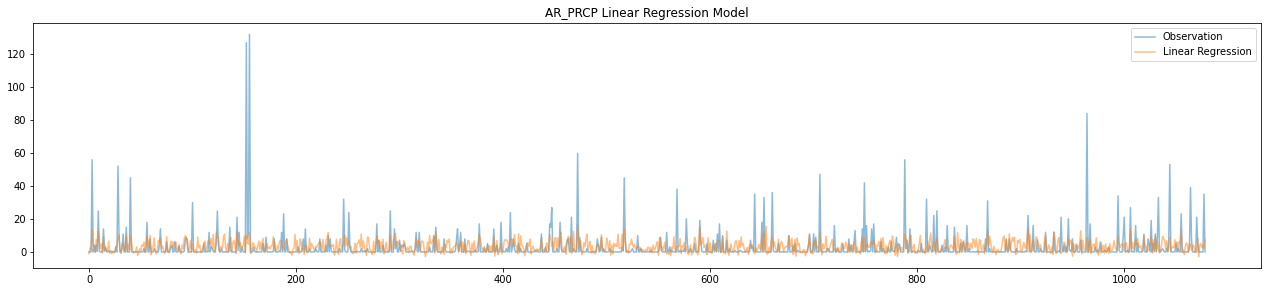

In [0]:
# Separate observation precipitation and features
y = data['AR_PRCP'].to_numpy()
X = data.drop(columns = ['AR_PRCP']).to_numpy()

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.figure(figsize=(22, 4.5))
plt.plot(test_y, alpha=0.5, label='Observation')
plt.plot(LinearRegression_predict_y, alpha=0.5, label='Linear Regression')
plt.title('AR_PRCP Linear Regression Model')
plt.legend()
plt.show()

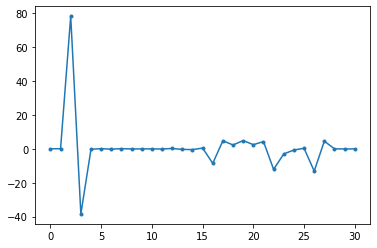

In [0]:
plt.plot(model_LinearRegression.coef_, '.-')

# (2) AR_TMAX linear regression

In [0]:
# clean the data
data = AR_MJOIndices_df.drop(columns = ['AR_PRCP', 'AR_TMIN'])
data = data.dropna()
data

Date,AR_TMAX,MJOPhase_OLR,MJOAmplitude_OLR,AR_ERA5_Soil_Moisture_Lev1,AR_ERA5_Soil_Moisture_Lev2,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,AR_ERA5_Soil_Moisture_Lev1_lag5,AR_ERA5_Soil_Moisture_Lev1_lag10,AR_ERA5_Soil_Moisture_Lev1_lag15,AR_ERA5_Soil_Moisture_Lev1_lag20,AR_ERA5_Soil_Moisture_Lev1_lag25,AR_ERA5_Soil_Moisture_Lev1_lag30,AR_ERA5_Soil_Moisture_Lev2_lag5,AR_ERA5_Soil_Moisture_Lev2_lag10,AR_ERA5_Soil_Moisture_Lev2_lag15,AR_ERA5_Soil_Moisture_Lev2_lag20,AR_ERA5_Soil_Moisture_Lev2_lag25,AR_ERA5_Soil_Moisture_Lev2_lag30,Year,Month,Day
1980-01-31,22.6,6,0.3975,0.152423,0.134350,3.0,3.0,2.0,6.0,6.0,5.0,0.6533,0.5613,1.0754,0.3725,1.0925,0.6049,0.130368,0.163497,0.123818,0.127306,0.251666,0.209384,0.144561,0.145917,0.140556,0.157797,0.182244,0.205773,1980,1,31
1980-02-01,32.6,7,0.6582,0.141878,0.134352,3.0,3.0,2.0,7.0,6.0,5.0,0.5261,0.8126,1.2639,0.1387,1.0085,0.6069,0.127022,0.139332,0.138247,0.127563,0.213741,0.181627,0.143543,0.142714,0.137714,0.155290,0.182026,0.198426,1980,2,1
1980-02-02,32.6,8,0.7567,0.139373,0.129875,4.0,3.0,2.0,2.0,6.0,5.0,0.7312,1.0203,1.1226,0.1655,0.6414,0.5613,0.121480,0.130671,0.195342,0.136222,0.179305,0.175117,0.141021,0.140684,0.141986,0.154734,0.175289,0.192707,1980,2,2
1980-02-03,33.0,8,0.8586,0.164461,0.135403,4.0,3.0,2.0,1.0,6.0,6.0,0.8306,1.1084,0.8344,0.6030,0.4999,0.6842,0.116560,0.130969,0.234070,0.129922,0.152985,0.150012,0.138585,0.141916,0.147601,0.152672,0.167510,0.179462,1980,2,3
1980-02-04,34.2,7,0.8608,0.146895,0.132288,4.0,3.0,3.0,2.0,6.0,6.0,0.7665,0.8752,0.5924,0.8311,0.4700,0.8435,0.125822,0.126240,0.193540,0.122978,0.136733,0.191845,0.135657,0.141427,0.146904,0.148255,0.161294,0.175685,1980,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-20,30.5,4,0.5752,0.235895,0.146751,3.0,2.0,2.0,2.0,3.0,1.0,1.2130,1.0314,0.8372,0.7178,0.4190,1.1800,0.131006,0.126849,0.152296,0.153076,0.224577,0.120991,0.145781,0.139144,0.150338,0.161003,0.154562,0.147630,2019,12,20
2019-12-24,36.8,5,1.0406,0.131774,0.139379,4.0,2.0,2.0,2.0,1.0,3.0,0.6850,1.4550,1.0979,0.5831,0.9184,0.5886,0.128414,0.126334,0.126544,0.149358,0.171604,0.161160,0.143530,0.144358,0.140817,0.151408,0.164705,0.153587,2019,12,24
2019-12-28,36.0,7,0.8633,0.127302,0.142428,5.0,4.0,3.0,2.0,2.0,1.0,0.9082,0.8321,1.4159,0.9916,0.5849,0.7808,0.145862,0.121794,0.129112,0.134989,0.149021,0.190800,0.140540,0.141074,0.143887,0.143760,0.151128,0.169635,2019,12,28
2019-12-30,35.2,8,0.6520,0.162332,0.140790,6.0,4.0,3.0,2.0,2.0,2.0,1.3163,0.5752,1.2130,1.0314,0.8372,0.7178,0.137483,0.235895,0.131006,0.126849,0.152296,0.153076,0.144089,0.146751,0.145781,0.139144,0.150338,0.161003,2019,12,30


RMSE of linear regression model:  4.534157890913239


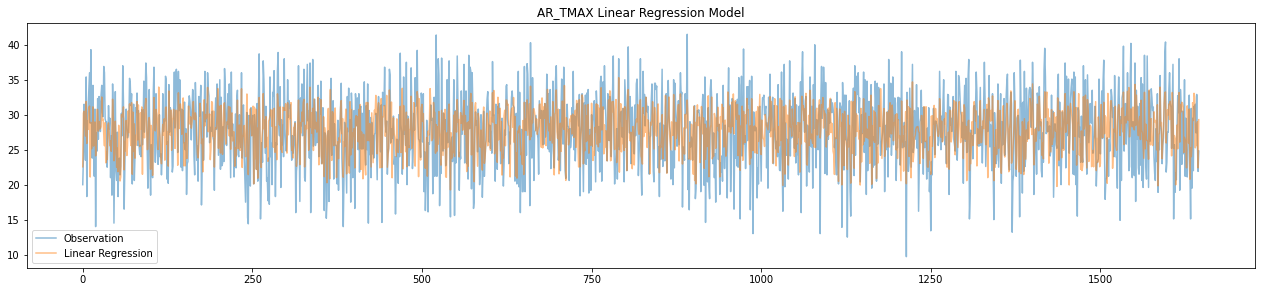

In [0]:
# Separate observation precipitation and features
y = data['AR_TMAX'].to_numpy()
X = data.drop(columns = ['AR_TMAX']).to_numpy()

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.figure(figsize=(22, 4.5))
plt.plot(test_y, alpha=0.5, label='Observation')
plt.plot(LinearRegression_predict_y, alpha=0.5, label='Linear Regression')
plt.title('AR_TMAX Linear Regression Model')
plt.legend()
plt.show()

# (3) AR_TMIN linear regression

In [0]:
# clean the data
data = AR_MJOIndices_df.drop(columns = ['AR_PRCP', 'AR_TMAX'])
data = data.dropna()
data

Date,AR_TMIN,MJOPhase_OLR,MJOAmplitude_OLR,AR_ERA5_Soil_Moisture_Lev1,AR_ERA5_Soil_Moisture_Lev2,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,AR_ERA5_Soil_Moisture_Lev1_lag5,AR_ERA5_Soil_Moisture_Lev1_lag10,AR_ERA5_Soil_Moisture_Lev1_lag15,AR_ERA5_Soil_Moisture_Lev1_lag20,AR_ERA5_Soil_Moisture_Lev1_lag25,AR_ERA5_Soil_Moisture_Lev1_lag30,AR_ERA5_Soil_Moisture_Lev2_lag5,AR_ERA5_Soil_Moisture_Lev2_lag10,AR_ERA5_Soil_Moisture_Lev2_lag15,AR_ERA5_Soil_Moisture_Lev2_lag20,AR_ERA5_Soil_Moisture_Lev2_lag25,AR_ERA5_Soil_Moisture_Lev2_lag30,Year,Month,Day
1980-01-31,15.2,6,0.3975,0.152423,0.134350,3.0,3.0,2.0,6.0,6.0,5.0,0.6533,0.5613,1.0754,0.3725,1.0925,0.6049,0.130368,0.163497,0.123818,0.127306,0.251666,0.209384,0.144561,0.145917,0.140556,0.157797,0.182244,0.205773,1980,1,31
1980-02-01,9.9,7,0.6582,0.141878,0.134352,3.0,3.0,2.0,7.0,6.0,5.0,0.5261,0.8126,1.2639,0.1387,1.0085,0.6069,0.127022,0.139332,0.138247,0.127563,0.213741,0.181627,0.143543,0.142714,0.137714,0.155290,0.182026,0.198426,1980,2,1
1980-02-02,22.3,8,0.7567,0.139373,0.129875,4.0,3.0,2.0,2.0,6.0,5.0,0.7312,1.0203,1.1226,0.1655,0.6414,0.5613,0.121480,0.130671,0.195342,0.136222,0.179305,0.175117,0.141021,0.140684,0.141986,0.154734,0.175289,0.192707,1980,2,2
1980-02-03,19.5,8,0.8586,0.164461,0.135403,4.0,3.0,2.0,1.0,6.0,6.0,0.8306,1.1084,0.8344,0.6030,0.4999,0.6842,0.116560,0.130969,0.234070,0.129922,0.152985,0.150012,0.138585,0.141916,0.147601,0.152672,0.167510,0.179462,1980,2,3
1980-02-04,19.0,7,0.8608,0.146895,0.132288,4.0,3.0,3.0,2.0,6.0,6.0,0.7665,0.8752,0.5924,0.8311,0.4700,0.8435,0.125822,0.126240,0.193540,0.122978,0.136733,0.191845,0.135657,0.141427,0.146904,0.148255,0.161294,0.175685,1980,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,10.8,6,1.3163,0.137483,0.144089,4.0,3.0,2.0,2.0,2.0,3.0,0.5752,1.2130,1.0314,0.8372,0.7178,0.4190,0.235895,0.131006,0.126849,0.152296,0.153076,0.224577,0.146751,0.145781,0.139144,0.150338,0.161003,0.154562,2019,12,25
2019-12-26,13.1,6,1.2575,0.132407,0.143046,5.0,3.0,2.0,2.0,2.0,2.0,0.5292,0.9968,1.1981,0.9479,0.4977,0.3398,0.205727,0.125490,0.128425,0.139499,0.144256,0.266400,0.149838,0.143572,0.143787,0.147473,0.158799,0.171452,2019,12,26
2019-12-27,21.0,6,1.1587,0.128531,0.143121,5.0,3.0,2.0,2.0,2.0,1.0,0.7047,0.9707,1.2778,1.0271,0.5132,0.6084,0.174359,0.121929,0.128356,0.130884,0.133617,0.220583,0.146542,0.140451,0.143045,0.144076,0.153391,0.172145,2019,12,27
2019-12-29,13.0,7,0.8687,0.124223,0.140815,5.0,4.0,2.0,2.0,2.0,1.0,1.0406,0.6850,1.4550,1.0979,0.5831,0.9184,0.131774,0.128414,0.126334,0.126544,0.149358,0.171604,0.139379,0.143530,0.144358,0.140817,0.151408,0.164705,2019,12,29


RMSE of linear regression model:  4.637829820601348


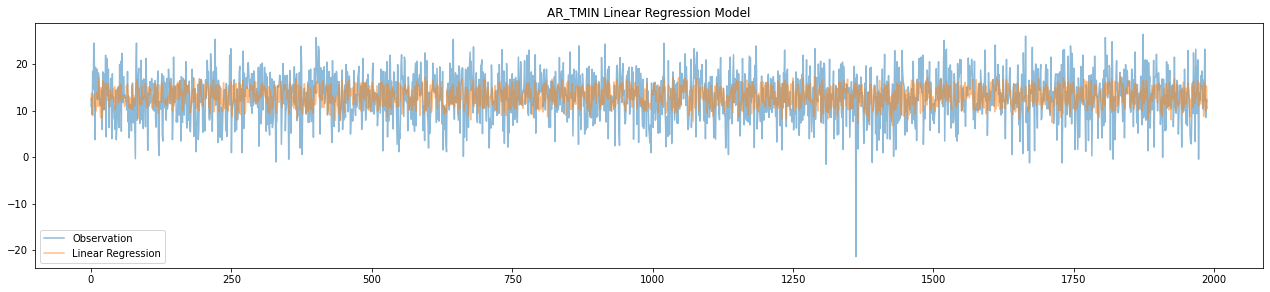

In [0]:
# Separate observation precipitation and features
y = data['AR_TMIN'].to_numpy()
X = data.drop(columns = ['AR_TMIN']).to_numpy()

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.figure(figsize=(22, 4.5))
plt.plot(test_y, alpha=0.5, label='Observation')
plt.plot(LinearRegression_predict_y, alpha=0.5, label='Linear Regression')
plt.title('AR_TMIN Linear Regression Model')
plt.legend()
plt.show()

# (4) UR_PRCP linear regression

In [0]:
# clean the data
data = UR_MJOIndices_df.drop(columns = ['UR_TMAX', 'UR_TMIN'])
data = data.dropna()
data

Date,UR_PRCP,MJOPhase_OLR,MJOAmplitude_OLR,UR_ERA5_Soil_Moisture_Lev1,UR_ERA5_Soil_Moisture_Lev2,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,UR_ERA5_Soil_Moisture_Lev1_lag5,UR_ERA5_Soil_Moisture_Lev1_lag10,UR_ERA5_Soil_Moisture_Lev1_lag15,UR_ERA5_Soil_Moisture_Lev1_lag20,UR_ERA5_Soil_Moisture_Lev1_lag25,UR_ERA5_Soil_Moisture_Lev1_lag30,UR_ERA5_Soil_Moisture_Lev2_lag5,UR_ERA5_Soil_Moisture_Lev2_lag10,UR_ERA5_Soil_Moisture_Lev2_lag15,UR_ERA5_Soil_Moisture_Lev2_lag20,UR_ERA5_Soil_Moisture_Lev2_lag25,UR_ERA5_Soil_Moisture_Lev2_lag30,Year,Month,Day
1980-01-31,0.3,6,0.3975,0.289376,0.239638,3.0,3.0,2.0,6.0,6.0,5.0,0.6533,0.5613,1.0754,0.3725,1.0925,0.6049,0.300232,0.247832,0.236016,0.278355,0.378380,0.288419,0.243736,0.252976,0.251706,0.257351,0.254749,0.282159,1980,1,31
1980-02-01,15.0,7,0.6582,0.355200,0.258492,3.0,3.0,2.0,7.0,6.0,5.0,0.5261,0.8126,1.2639,0.1387,1.0085,0.6069,0.254439,0.237096,0.237202,0.261407,0.378784,0.266946,0.241116,0.248322,0.252438,0.255847,0.260869,0.273913,1980,2,1
1980-02-02,0.0,8,0.7567,0.305246,0.255230,4.0,3.0,2.0,2.0,6.0,5.0,0.7312,1.0203,1.1226,0.1655,0.6414,0.5613,0.254654,0.226919,0.232744,0.247805,0.349049,0.249743,0.240585,0.241227,0.250312,0.252596,0.259042,0.265073,1980,2,2
1980-02-03,0.0,8,0.8586,0.270817,0.250387,4.0,3.0,2.0,1.0,6.0,6.0,0.8306,1.1084,0.8344,0.6030,0.4999,0.6842,0.243554,0.438556,0.260681,0.241803,0.365747,0.236287,0.239560,0.249979,0.249014,0.252696,0.263898,0.256058,1980,2,3
1980-02-18,0.0,8,1.0633,0.425359,0.400885,7.0,7.0,8.0,4.0,3.0,2.0,1.2473,0.9504,0.8586,0.8306,1.1084,0.8344,0.343672,0.318900,0.270817,0.243554,0.438556,0.260681,0.355557,0.318151,0.250387,0.239560,0.249979,0.249014,1980,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,0.0,6,1.2575,0.250280,0.295109,5.0,3.0,2.0,2.0,2.0,2.0,0.5292,0.9968,1.1981,0.9479,0.4977,0.3398,0.296616,0.410803,0.240112,0.275921,0.346080,0.398360,0.305062,0.333486,0.286710,0.329122,0.388174,0.331988,2019,12,26
2019-12-27,0.0,6,1.1587,0.252046,0.296892,5.0,3.0,2.0,2.0,2.0,1.0,0.7047,0.9707,1.2778,1.0271,0.5132,0.6084,0.289805,0.368977,0.245598,0.264591,0.323730,0.457367,0.307601,0.330680,0.293596,0.316519,0.374957,0.445605,2019,12,27
2019-12-28,0.0,7,0.8633,0.248207,0.294636,5.0,4.0,3.0,2.0,2.0,1.0,0.9082,0.8321,1.4159,0.9916,0.5849,0.7808,0.274193,0.333628,0.255413,0.256981,0.304944,0.418799,0.301299,0.323458,0.296997,0.309881,0.359997,0.429099,2019,12,28
2019-12-29,32.5,7,0.8687,0.302355,0.290420,5.0,4.0,2.0,2.0,2.0,1.0,1.0406,0.6850,1.4550,1.0979,0.5831,0.9184,0.259452,0.303396,0.263900,0.246490,0.294355,0.383785,0.293953,0.315749,0.307738,0.298280,0.350091,0.410580,2019,12,29


RMSE of linear regression model:  15.277552353070828


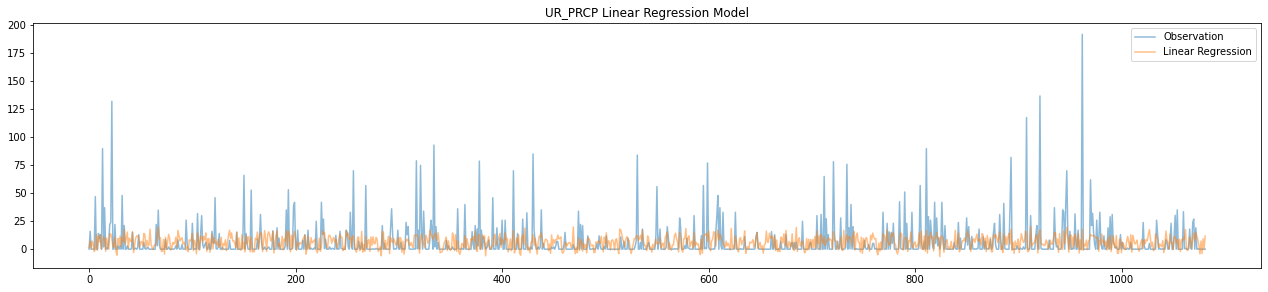

In [0]:
# Separate observation precipitation and features
y = data['UR_PRCP'].to_numpy()
X = data.drop(columns = ['UR_PRCP']).to_numpy()

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.figure(figsize=(22, 4.5))
plt.plot(test_y, alpha=0.5, label='Observation')
plt.plot(LinearRegression_predict_y, alpha=0.5, label='Linear Regression')
plt.title('UR_PRCP Linear Regression Model')
plt.legend()
plt.show()

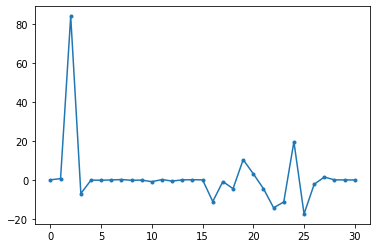

In [0]:
plt.plot(model_LinearRegression.coef_, '.-')

# (5) UR_TMAX linear regression

In [0]:
# clean the data
data = UR_MJOIndices_df.drop(columns = ['UR_PRCP', 'UR_TMIN'])
data = data.dropna()
data

Date,UR_TMAX,MJOPhase_OLR,MJOAmplitude_OLR,UR_ERA5_Soil_Moisture_Lev1,UR_ERA5_Soil_Moisture_Lev2,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,UR_ERA5_Soil_Moisture_Lev1_lag5,UR_ERA5_Soil_Moisture_Lev1_lag10,UR_ERA5_Soil_Moisture_Lev1_lag15,UR_ERA5_Soil_Moisture_Lev1_lag20,UR_ERA5_Soil_Moisture_Lev1_lag25,UR_ERA5_Soil_Moisture_Lev1_lag30,UR_ERA5_Soil_Moisture_Lev2_lag5,UR_ERA5_Soil_Moisture_Lev2_lag10,UR_ERA5_Soil_Moisture_Lev2_lag15,UR_ERA5_Soil_Moisture_Lev2_lag20,UR_ERA5_Soil_Moisture_Lev2_lag25,UR_ERA5_Soil_Moisture_Lev2_lag30,Year,Month,Day
1980-01-31,34.0,6,0.3975,0.289376,0.239638,3.0,3.0,2.0,6.0,6.0,5.0,0.6533,0.5613,1.0754,0.3725,1.0925,0.6049,0.300232,0.247832,0.236016,0.278355,0.378380,0.288419,0.243736,0.252976,0.251706,0.257351,0.254749,0.282159,1980,1,31
1980-02-18,27.0,8,1.0633,0.425359,0.400885,7.0,7.0,8.0,4.0,3.0,2.0,1.2473,0.9504,0.8586,0.8306,1.1084,0.8344,0.343672,0.318900,0.270817,0.243554,0.438556,0.260681,0.355557,0.318151,0.250387,0.239560,0.249979,0.249014,1980,2,18
1980-03-27,25.0,7,2.1177,0.492233,0.457977,7.0,6.0,5.0,3.0,2.0,1.0,1.5586,0.7874,0.8779,1.0898,0.9586,0.5119,0.283144,0.364881,0.486416,0.428523,0.334701,0.396746,0.332373,0.392310,0.496960,0.353307,0.316085,0.362450,1980,3,27
1980-03-29,26.0,7,2.2260,0.466323,0.470913,6.0,7.0,5.0,4.0,2.0,2.0,1.5997,1.4103,0.5164,1.5145,0.8723,0.6496,0.266375,0.325837,0.432075,0.383248,0.348544,0.337149,0.319558,0.365840,0.439504,0.352976,0.316522,0.340168,1980,3,29
1980-10-03,21.0,7,0.5846,0.281876,0.279286,8.0,1.0,8.0,6.0,5.0,5.0,0.4024,1.6350,1.0343,1.7417,1.6954,0.9982,0.265182,0.289322,0.368733,0.291060,0.272306,0.339187,0.295312,0.314519,0.358010,0.289658,0.308613,0.348651,1980,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-21,33.4,5,0.5292,0.296616,0.305062,3.0,2.0,2.0,2.0,2.0,1.0,0.9968,1.1981,0.9479,0.4977,0.3398,1.0919,0.410803,0.240112,0.275921,0.346080,0.398360,0.260761,0.333486,0.286710,0.329122,0.388174,0.331988,0.324105,2019,12,21
2019-12-26,34.4,6,1.2575,0.250280,0.295109,5.0,3.0,2.0,2.0,2.0,2.0,0.5292,0.9968,1.1981,0.9479,0.4977,0.3398,0.296616,0.410803,0.240112,0.275921,0.346080,0.398360,0.305062,0.333486,0.286710,0.329122,0.388174,0.331988,2019,12,26
2019-12-28,38.8,7,0.8633,0.248207,0.294636,5.0,4.0,3.0,2.0,2.0,1.0,0.9082,0.8321,1.4159,0.9916,0.5849,0.7808,0.274193,0.333628,0.255413,0.256981,0.304944,0.418799,0.301299,0.323458,0.296997,0.309881,0.359997,0.429099,2019,12,28
2019-12-29,38.5,7,0.8687,0.302355,0.290420,5.0,4.0,2.0,2.0,2.0,1.0,1.0406,0.6850,1.4550,1.0979,0.5831,0.9184,0.259452,0.303396,0.263900,0.246490,0.294355,0.383785,0.293953,0.315749,0.307738,0.298280,0.350091,0.410580,2019,12,29


RMSE of linear regression model:  3.3707132864385576


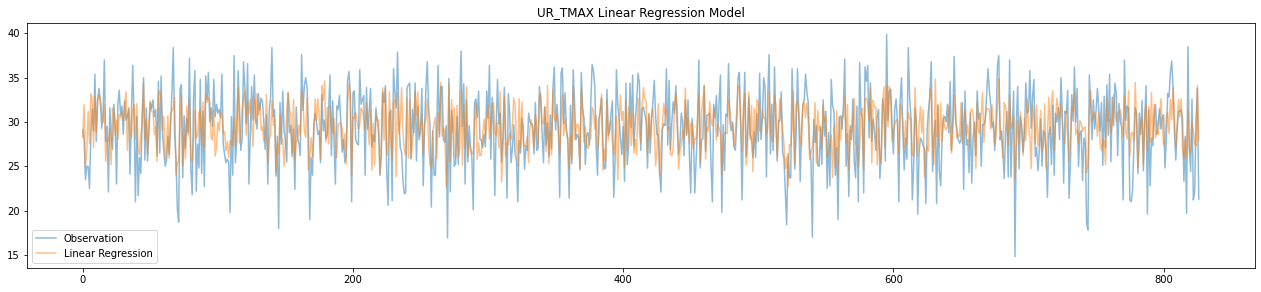

In [0]:
# Separate observation precipitation and features
y = data['UR_TMAX'].to_numpy()
X = data.drop(columns = ['UR_TMAX']).to_numpy()

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.figure(figsize=(22, 4.5))
plt.plot(test_y, alpha=0.5, label='Observation')
plt.plot(LinearRegression_predict_y, alpha=0.5, label='Linear Regression')
plt.title('UR_TMAX Linear Regression Model')
plt.legend()
plt.show()

# (6) UR_TMIN linear regression

In [0]:
# clean the data
data = UR_MJOIndices_df.drop(columns = ['UR_PRCP', 'UR_TMAX'])
data = data.dropna()
data

Date,UR_TMIN,MJOPhase_OLR,MJOAmplitude_OLR,UR_ERA5_Soil_Moisture_Lev1,UR_ERA5_Soil_Moisture_Lev2,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,UR_ERA5_Soil_Moisture_Lev1_lag5,UR_ERA5_Soil_Moisture_Lev1_lag10,UR_ERA5_Soil_Moisture_Lev1_lag15,UR_ERA5_Soil_Moisture_Lev1_lag20,UR_ERA5_Soil_Moisture_Lev1_lag25,UR_ERA5_Soil_Moisture_Lev1_lag30,UR_ERA5_Soil_Moisture_Lev2_lag5,UR_ERA5_Soil_Moisture_Lev2_lag10,UR_ERA5_Soil_Moisture_Lev2_lag15,UR_ERA5_Soil_Moisture_Lev2_lag20,UR_ERA5_Soil_Moisture_Lev2_lag25,UR_ERA5_Soil_Moisture_Lev2_lag30,Year,Month,Day
1980-01-31,22.0,6,0.3975,0.289376,0.239638,3.0,3.0,2.0,6.0,6.0,5.0,0.6533,0.5613,1.0754,0.3725,1.0925,0.6049,0.300232,0.247832,0.236016,0.278355,0.378380,0.288419,0.243736,0.252976,0.251706,0.257351,0.254749,0.282159,1980,1,31
1980-02-01,19.0,7,0.6582,0.355200,0.258492,3.0,3.0,2.0,7.0,6.0,5.0,0.5261,0.8126,1.2639,0.1387,1.0085,0.6069,0.254439,0.237096,0.237202,0.261407,0.378784,0.266946,0.241116,0.248322,0.252438,0.255847,0.260869,0.273913,1980,2,1
1980-02-02,14.0,8,0.7567,0.305246,0.255230,4.0,3.0,2.0,2.0,6.0,5.0,0.7312,1.0203,1.1226,0.1655,0.6414,0.5613,0.254654,0.226919,0.232744,0.247805,0.349049,0.249743,0.240585,0.241227,0.250312,0.252596,0.259042,0.265073,1980,2,2
1980-02-03,18.0,8,0.8586,0.270817,0.250387,4.0,3.0,2.0,1.0,6.0,6.0,0.8306,1.1084,0.8344,0.6030,0.4999,0.6842,0.243554,0.438556,0.260681,0.241803,0.365747,0.236287,0.239560,0.249979,0.249014,0.252696,0.263898,0.256058,1980,2,3
1980-02-18,14.0,8,1.0633,0.425359,0.400885,7.0,7.0,8.0,4.0,3.0,2.0,1.2473,0.9504,0.8586,0.8306,1.1084,0.8344,0.343672,0.318900,0.270817,0.243554,0.438556,0.260681,0.355557,0.318151,0.250387,0.239560,0.249979,0.249014,1980,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,13.5,6,1.3163,0.249531,0.288972,4.0,3.0,2.0,2.0,2.0,3.0,0.5752,1.2130,1.0314,0.8372,0.7178,0.4190,0.282066,0.283434,0.239859,0.290329,0.361359,0.330483,0.307361,0.306723,0.290174,0.341213,0.399591,0.335807,2019,12,25
2019-12-26,20.0,6,1.2575,0.250280,0.295109,5.0,3.0,2.0,2.0,2.0,2.0,0.5292,0.9968,1.1981,0.9479,0.4977,0.3398,0.296616,0.410803,0.240112,0.275921,0.346080,0.398360,0.305062,0.333486,0.286710,0.329122,0.388174,0.331988,2019,12,26
2019-12-27,20.6,6,1.1587,0.252046,0.296892,5.0,3.0,2.0,2.0,2.0,1.0,0.7047,0.9707,1.2778,1.0271,0.5132,0.6084,0.289805,0.368977,0.245598,0.264591,0.323730,0.457367,0.307601,0.330680,0.293596,0.316519,0.374957,0.445605,2019,12,27
2019-12-29,20.2,7,0.8687,0.302355,0.290420,5.0,4.0,2.0,2.0,2.0,1.0,1.0406,0.6850,1.4550,1.0979,0.5831,0.9184,0.259452,0.303396,0.263900,0.246490,0.294355,0.383785,0.293953,0.315749,0.307738,0.298280,0.350091,0.410580,2019,12,29


RMSE of linear regression model:  3.3651068535941673


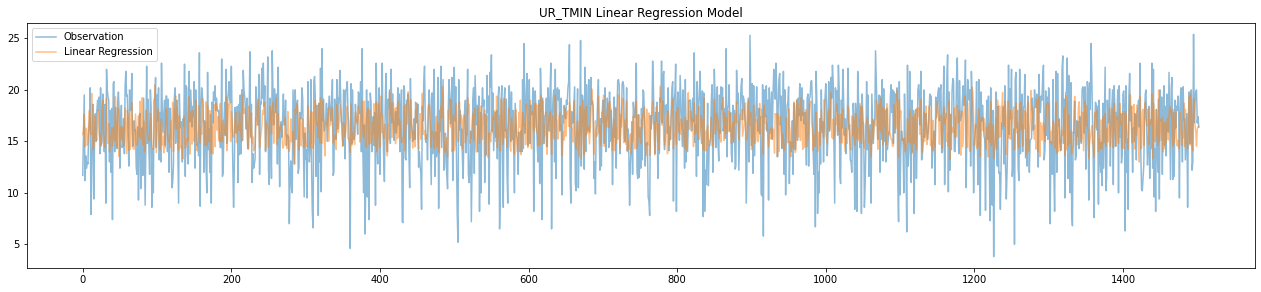

In [0]:
# Separate observation precipitation and features
y = data['UR_TMIN'].to_numpy()
X = data.drop(columns = ['UR_TMIN']).to_numpy()

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.figure(figsize=(22, 4.5))
plt.plot(test_y, alpha=0.5, label='Observation')
plt.plot(LinearRegression_predict_y, alpha=0.5, label='Linear Regression')
plt.title('UR_TMIN Linear Regression Model')
plt.legend()
plt.show()